<a href="https://colab.research.google.com/github/PaBakst/iad-intro-ds/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B4%D0%B0%D0%BD%D0%B0%2C_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#загружаем данные
install.packages("readxl")
library("readxl")
df_1 <- read_excel("dataset_andan.xlsx")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
df <-  data.frame(df_1) #загружает файл как датасет, иначе получается closure

In [ ]:
dim(df)

[1] 759   8

In [ ]:
summary(df) # до обработки датасета

      age             sex          profgroup       DEPRESSIVE    
 Min.   :18.00   Min.   :0.000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:27.00   1st Qu.:0.000   1st Qu.:2.000   1st Qu.:0.1905  
 Median :34.00   Median :1.000   Median :4.000   Median :0.2857  
 Mean   :35.63   Mean   :0.531   Mean   :3.401   Mean   :0.2902  
 3rd Qu.:42.00   3rd Qu.:1.000   3rd Qu.:5.000   3rd Qu.:0.3810  
 Max.   :71.00   Max.   :1.000   Max.   :6.000   Max.   :0.8095  
                                                                 
  CYCLOTHYMIC      HYPERTHYMIC       IRRITABLE         ANXIOUS      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1429   1st Qu.:0.4286   1st Qu.:0.0500   1st Qu.:0.1154  
 Median :0.2381   Median :0.5714   Median :0.1429   Median :0.1923  
 Mean   :0.2792   Mean   :0.5468   Mean   :0.1793   Mean   :0.2324  
 3rd Qu.:0.3810   3rd Qu.:0.6667   3rd Qu.:0.2500   3rd Qu.:0.3077  
 Max.   :1.0000   Max.   :1.2381   Max.   :1.0000   Max.  

In [ ]:
typeof(df) #ура, тип подходит для регрессии

[1] "list"

Как работать вместе в R: https://stackoverflow.com/questions/54595285/how-to-use-r-with-google-colaboratory


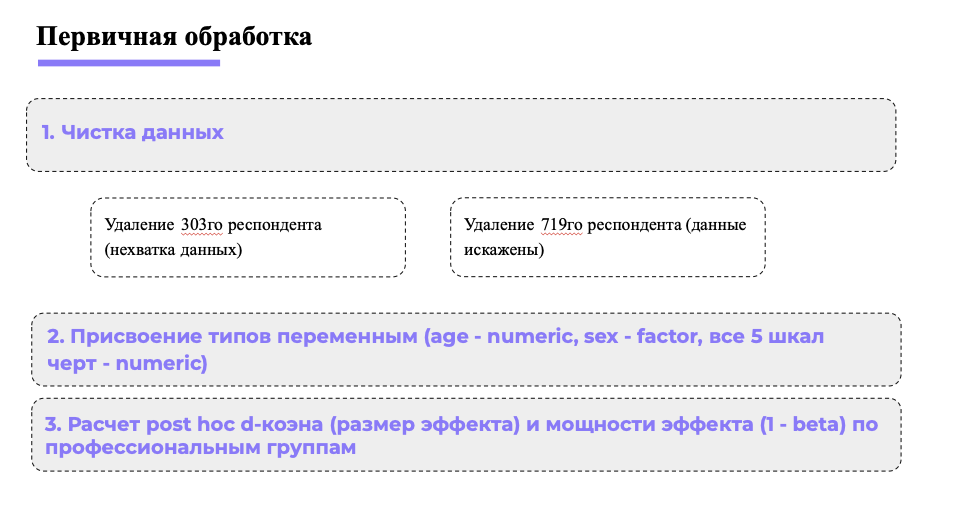

In [ ]:
sum(is.na(df))

[1] 1

In [ ]:
df$row_num <- seq.int(nrow(df)) #для удобства делаю еще один столбец с порядковым номером респондента
head(df)

,age,sex,profgroup,DEPRESSIVE,CYCLOTHYMIC,HYPERTHYMIC,IRRITABLE,ANXIOUS,row_num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,32,1,1,0.1904762,0.00000000,0.4285714,0.00,0.03846154,1
2,21,1,1,0.0952381,0.00000000,0.4285714,0.05,0.03846154,2
3,33,1,1,0.1428571,0.04761905,0.4285714,0.05,0.11538462,3
4,31,1,1,0.1904762,0.00000000,0.1904762,0.00,0.03846154,4
5,35,1,1,0.1428571,0.00000000,0.4285714,0.00,0.03846154,5
6,31,1,1,0.3333333,0.19047619,0.5238095,0.00,0.15384615,6


In [ ]:
library(tidyverse)

In [ ]:
df %>% filter(HYPERTHYMIC > 1) # посмотрела строки, где выпадающие значения

age,sex,profgroup,DEPRESSIVE,CYCLOTHYMIC,HYPERTHYMIC,IRRITABLE,ANXIOUS,row_num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
28,1,3,0.3333333,0.5238095,1.238095,0.05,0.1538462,292
44,1,6,0.3809524,0.0952381,1.142857,0.20,0.1923077,718


In [ ]:
# чистим данные - убираем 302 и 718го респондентов !! еще есть 293й, оказалось, есть еще пропущенные, удалила позже, в итоге датасет 756*8, 9ю переменную я ввожу для нумерации столбцов
#ну
df <- df[-c(292, 302, 718), ]

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
summary(df) # теперь в каждой шкале темперамента значения от 0 до 1

      age             sex           profgroup       DEPRESSIVE    
 Min.   :18.00   Min.   :0.0000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:0.1905  
 Median :34.00   Median :1.0000   Median :4.000   Median :0.2857  
 Mean   :35.65   Mean   :0.5291   Mean   :3.398   Mean   :0.2902  
 3rd Qu.:42.00   3rd Qu.:1.0000   3rd Qu.:5.000   3rd Qu.:0.3810  
 Max.   :71.00   Max.   :1.0000   Max.   :6.000   Max.   :0.8095  
  CYCLOTHYMIC      HYPERTHYMIC       IRRITABLE         ANXIOUS      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1429   1st Qu.:0.4286   1st Qu.:0.0500   1st Qu.:0.1154  
 Median :0.2381   Median :0.5714   Median :0.1429   Median :0.1923  
 Mean   :0.2791   Mean   :0.5450   Mean   :0.1796   Mean   :0.2328  
 3rd Qu.:0.3810   3rd Qu.:0.6667   3rd Qu.:0.2500   3rd Qu.:0.3077  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

присваиваем типы данных переменным

In [ ]:
str(df) # выводим информацию о типах данных

'data.frame':	756 obs. of  9 variables:
 $ age        : num  32 21 33 31 35 31 34 27 33 37 ...
 $ sex        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ profgroup  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ DEPRESSIVE : num  0.1905 0.0952 0.1429 0.1905 0.1429 ...
 $ CYCLOTHYMIC: num  0 0 0.0476 0 0 ...
 $ HYPERTHYMIC: num  0.429 0.429 0.429 0.19 0.429 ...
 $ IRRITABLE  : num  0 0.05 0.05 0 0 0 0 0.35 0.2 0.05 ...
 $ ANXIOUS    : num  0.0385 0.0385 0.1154 0.0385 0.0385 ...
 $ row_num    : int  1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
df$sex <- as.factor(df$sex)
#df$profgroup <- as.factor(df$profgroup) #переместить для конкретных целей
levels(df$sex) <- c('Female', 'Male') #переименовали уровни фактора в женщин(0) и мужчин(1) соответственно
#levels(df$profgroup) <- c('Firemen', 'Artists', "Athletes", "Bank Managers", "Nurses", "Paramedics") #то же для проф групп // нельзя переименовывать для цикла, 
# все остальные объекты уже в нужном типе данных -- numeric
str(df)

'data.frame':	756 obs. of  9 variables:
 $ age        : num  32 21 33 31 35 31 34 27 33 37 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ profgroup  : Factor w/ 6 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ DEPRESSIVE : num  0.1905 0.0952 0.1429 0.1905 0.1429 ...
 $ CYCLOTHYMIC: num  0 0 0.0476 0 0 ...
 $ HYPERTHYMIC: num  0.429 0.429 0.429 0.19 0.429 ...
 $ IRRITABLE  : num  0 0.05 0.05 0 0 0 0 0.35 0.2 0.05 ...
 $ ANXIOUS    : num  0.0385 0.0385 0.1154 0.0385 0.0385 ...
 $ row_num    : int  1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
dim(df) #размер датасета

[1] 756   9

In [ ]:
head(df) #итого получили чистый датасет с норм данными и проф группами

,age,sex,profgroup,DEPRESSIVE,CYCLOTHYMIC,HYPERTHYMIC,IRRITABLE,ANXIOUS,row_num
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,32,Male,1,0.1904762,0.00000000,0.4285714,0.00,0.03846154,1
2,21,Male,1,0.0952381,0.00000000,0.4285714,0.05,0.03846154,2
3,33,Male,1,0.1428571,0.04761905,0.4285714,0.05,0.11538462,3
4,31,Male,1,0.1904762,0.00000000,0.1904762,0.00,0.03846154,4
5,35,Male,1,0.1428571,0.00000000,0.4285714,0.00,0.03846154,5
6,31,Male,1,0.3333333,0.19047619,0.5238095,0.00,0.15384615,6


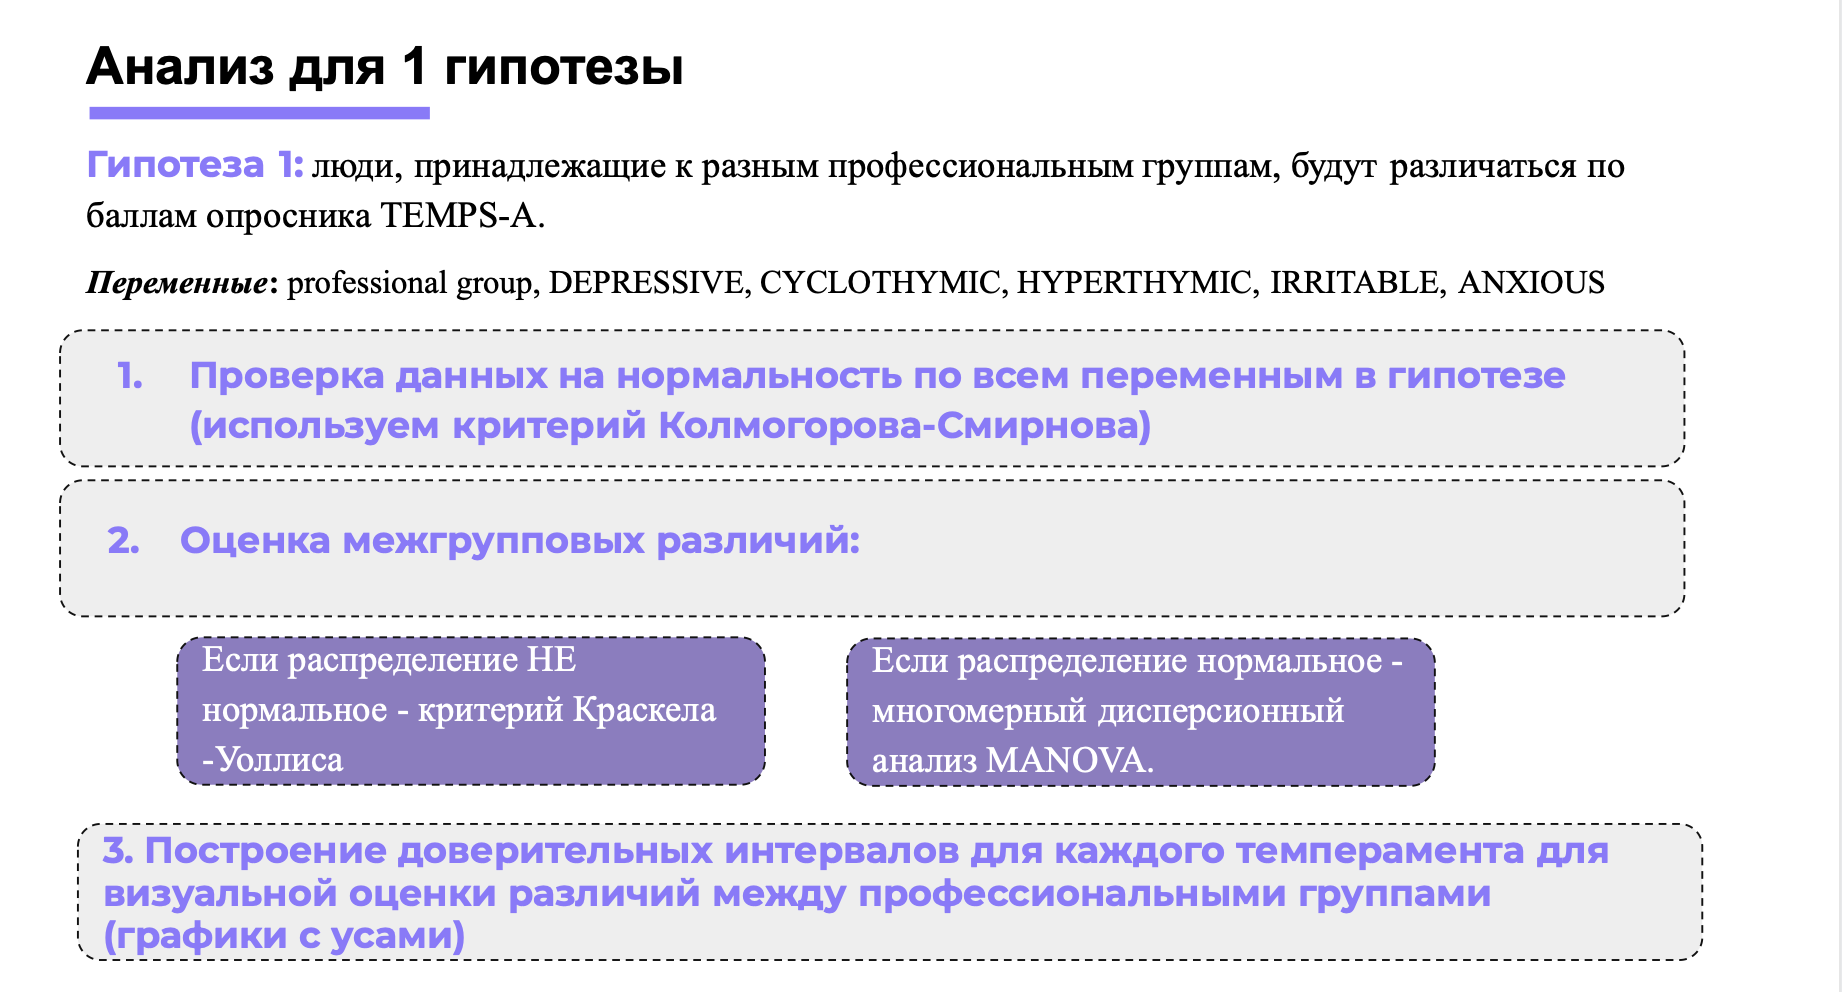

#Мы изменили Краскела-Уоллиса на подсчет размера эффекта, тк данная статистика нам ничего не дала


In [ ]:
install.packages("KScorrect")

#packageVersion("KScorrect")
#citation("KScorrect")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('KScorrect')

In [ ]:
# проводим более "правильный" анализ по лилли-форсу на нормальность данны -- это улучшенный колмогоров смирнов
LcKS(df$DEPRESSIVE, cdf = 'pnorm')$p.value
LcKS(df$CYCLOTHYMIC, cdf = 'pnorm')$p.value
LcKS(df$HYPERTHYMIC, cdf = 'pnorm')$p.value
LcKS(df$IRRITABLE, cdf = 'pnorm')$p.value
LcKS(df$ANXIOUS, cdf = 'pnorm')$p.value


[1] 2e-04

[1] 2e-04

[1] 2e-04

[1] 2e-04

[1] 2e-04

Почему используем его вместо КС:

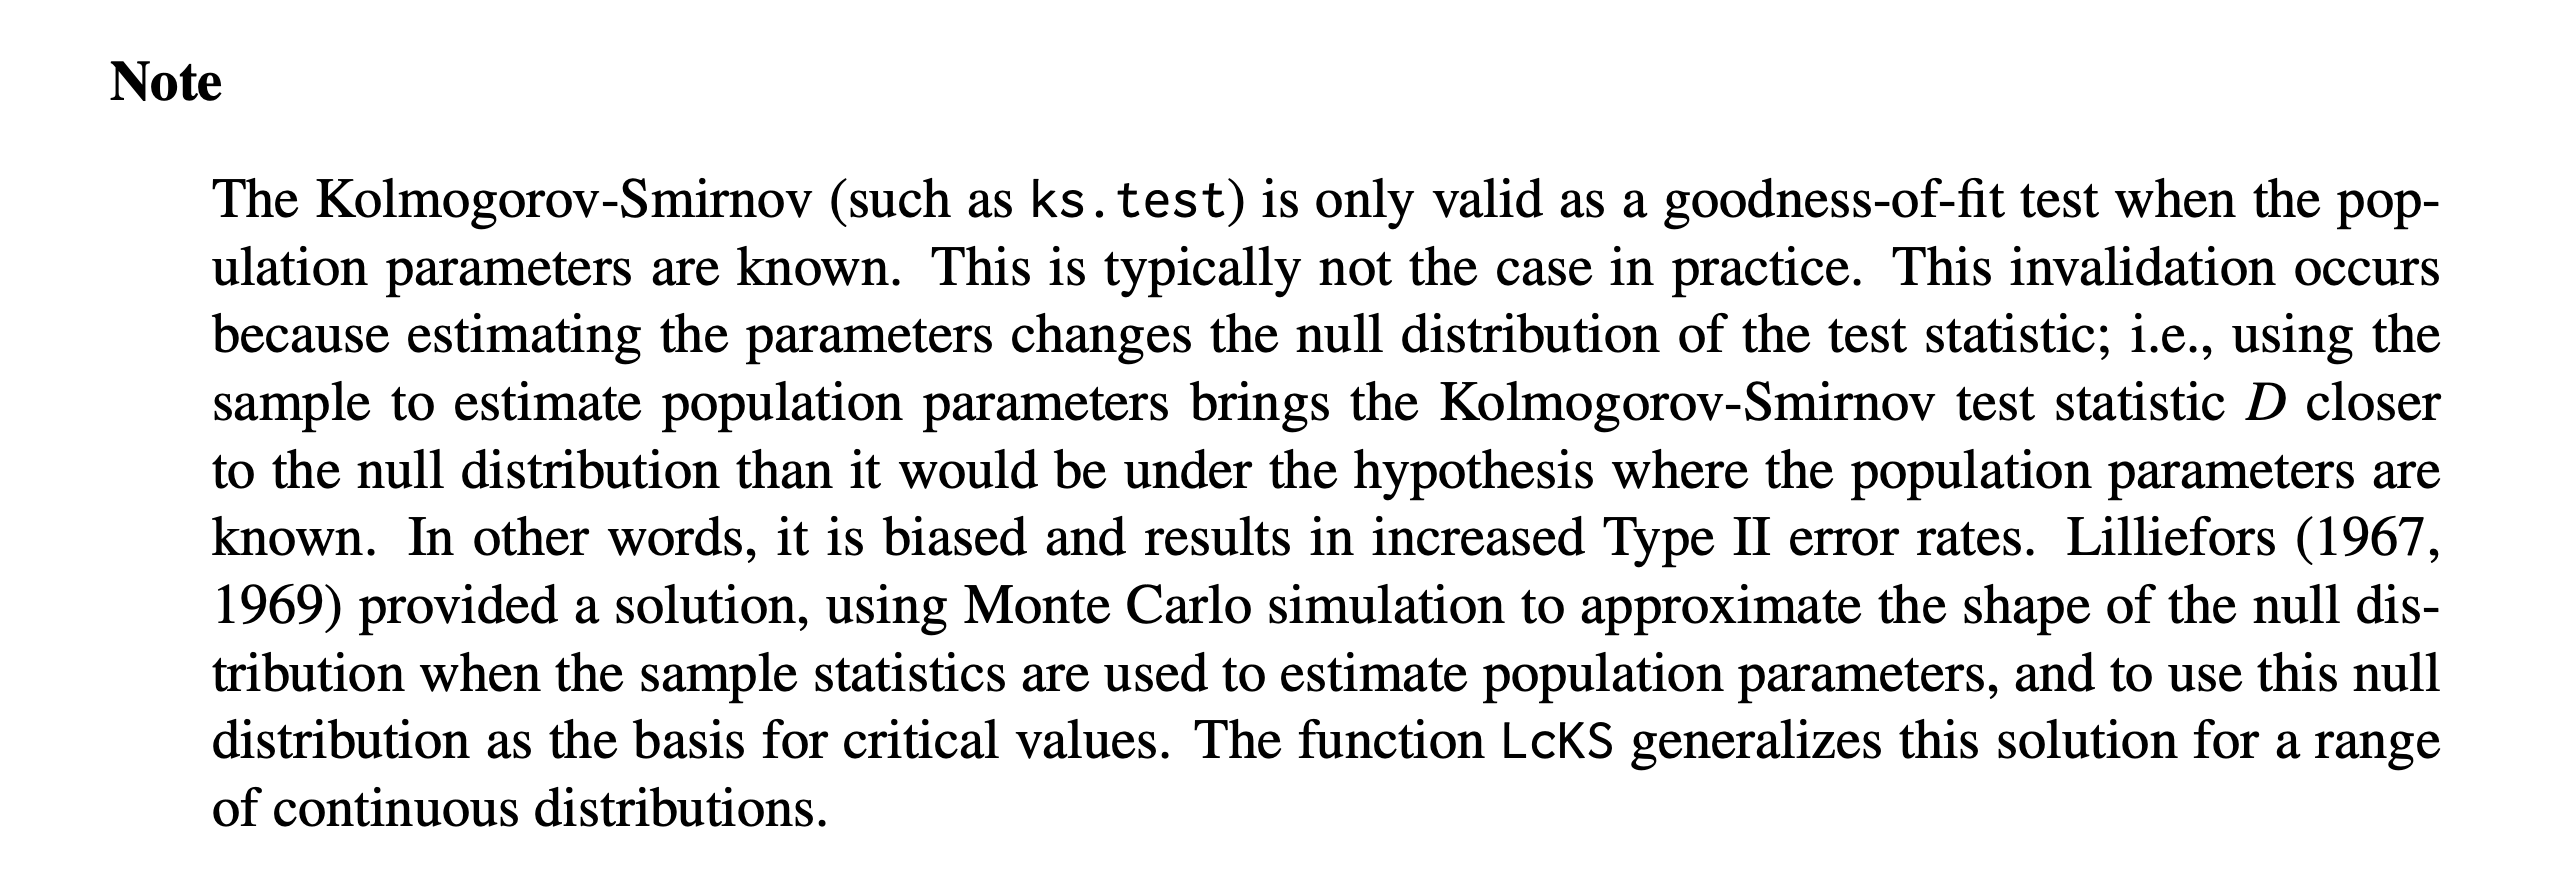

Источник-описание пакета: https://cran.r-project.org/web/packages/KScorrect/KScorrect.pdf

In [ ]:
# проверяем данные на нормальность
# это можно сделать циклом, в R я пока не знаю как
ks.test(df$DEPRESSIVE, 'pnorm')
ks.test(df$CYCLOTHYMIC, 'pnorm')
ks.test(df$HYPERTHYMIC, 'pnorm')
ks.test(df$IRRITABLE, 'pnorm')
ks.test(df$ANXIOUS, 'pnorm')

Warning message in ks.test.default(df$DEPRESSIVE, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$DEPRESSIVE
D = 0.52213, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(df$CYCLOTHYMIC, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$CYCLOTHYMIC
D = 0.5, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(df$HYPERTHYMIC, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$HYPERTHYMIC
D = 0.54523, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(df$IRRITABLE, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$IRRITABLE
D = 0.5, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(df$ANXIOUS, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  df$ANXIOUS
D = 0.5, p-value < 2.2e-16
alternative hypothesis: two-sided


In [ ]:
install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library('nortest')

In [ ]:
lillie.test(df$DEPRESSIVE)
lillie.test(df$CYCLOTHYMIC)
lillie.test(df$HYPERTHYMIC)
lillie.test(df$IRRITABLE)
lillie.test(df$ANXIOUS)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$DEPRESSIVE
D = 0.14234, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$CYCLOTHYMIC
D = 0.11902, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$HYPERTHYMIC
D = 0.08362, p-value = 1.052e-13



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$IRRITABLE
D = 0.16713, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$ANXIOUS
D = 0.1337, p-value < 2.2e-16


#**все данные в колонках-шкалах распределены ненормально**






// ЧАСТЬ ДОПАНАЛИЗА -- а как они распределены? построим гистограмму

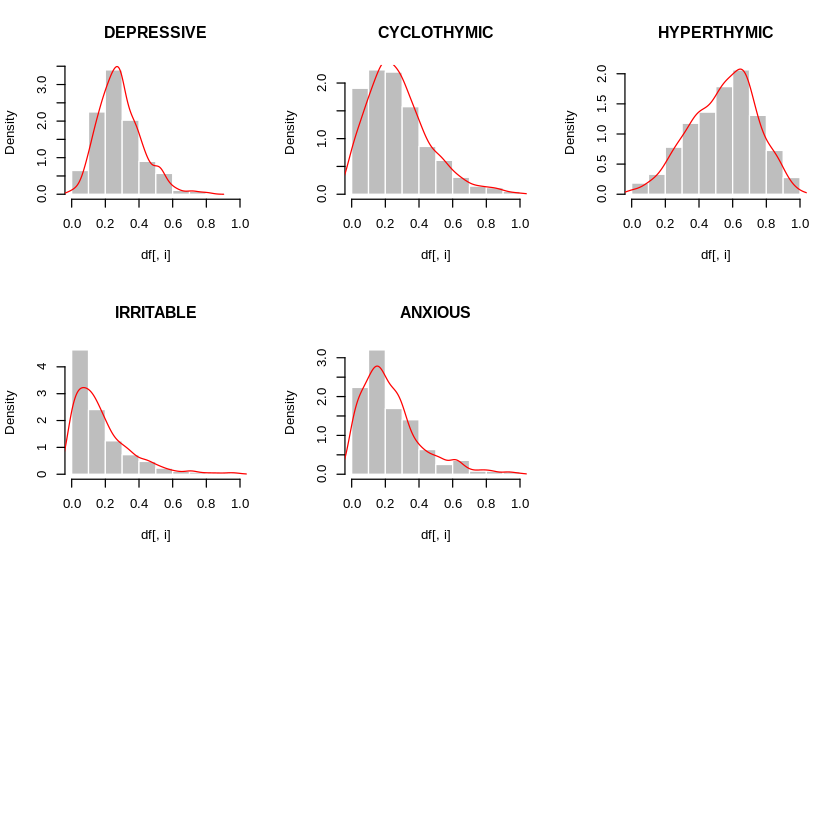

In [ ]:
par(mfrow=c(3, 3))
colnames <- dimnames(df)[[2]] #называет графики
for (i in 4:8) {
    hist(df[,i], xlim=c(0, 1), main=colnames[i], probability=TRUE, col="gray", border="white") #убрала шаг и ступеньки, получила графики
    d <- density(df[,i])
    lines(d, col="red")
}
# видно, что распределения далеки от нормальных

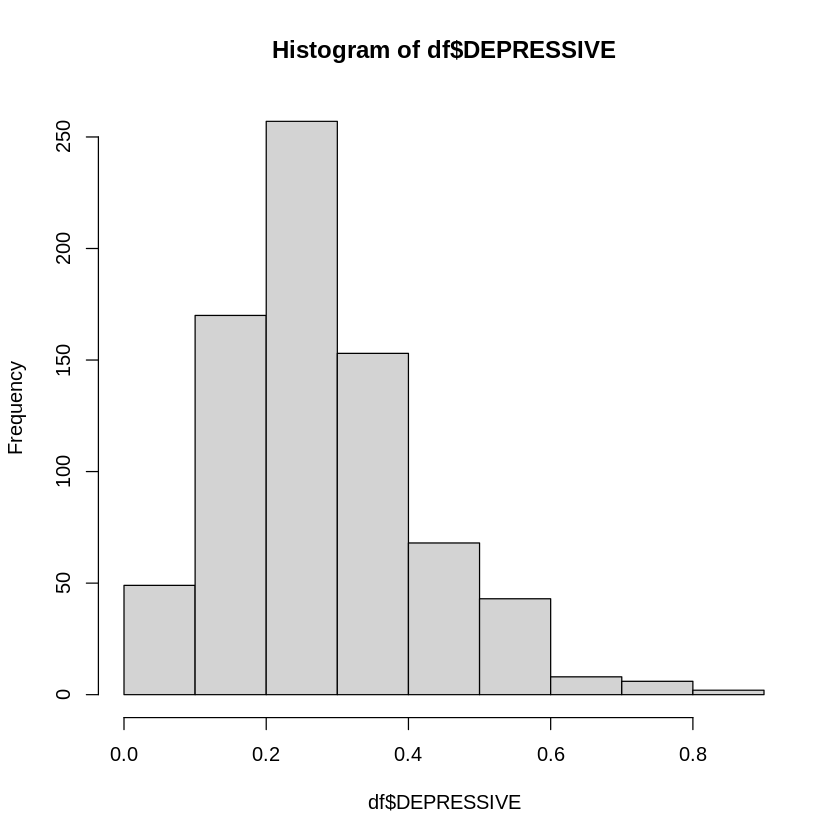

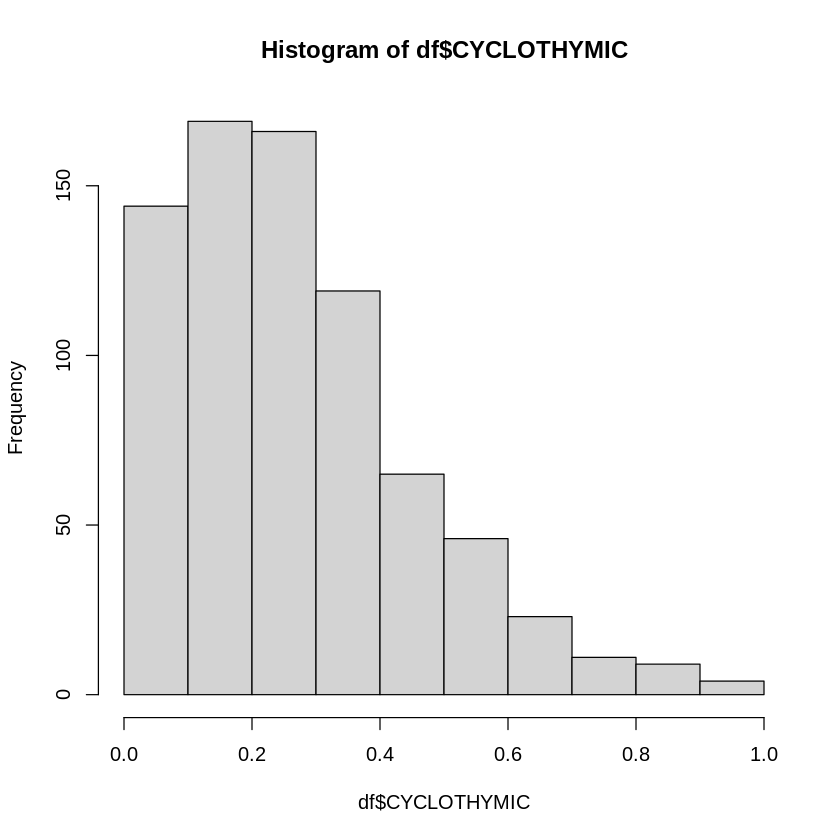

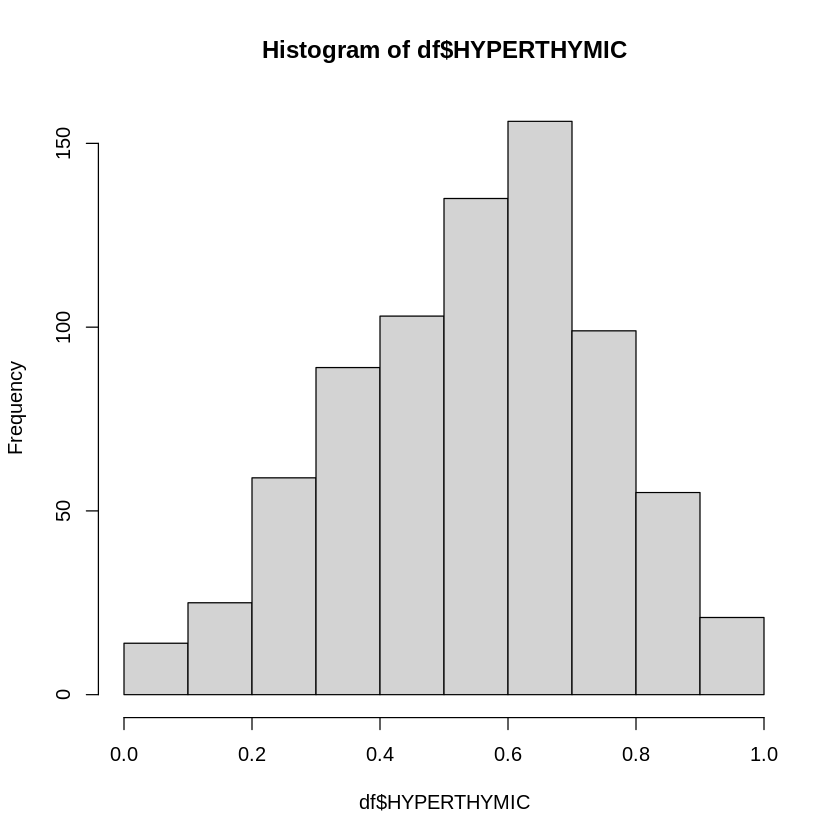

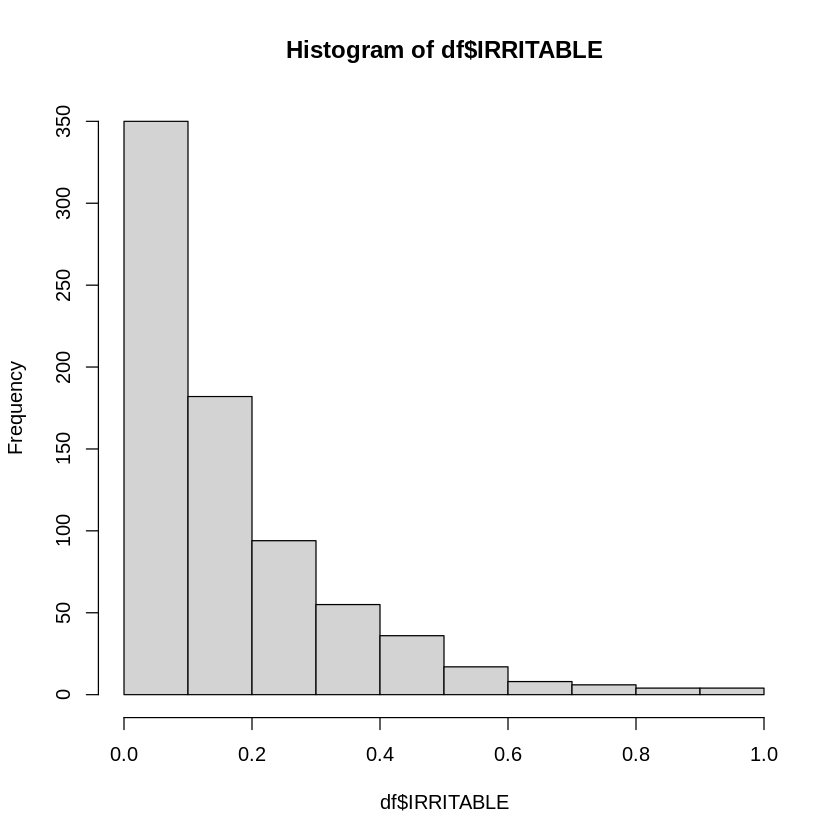

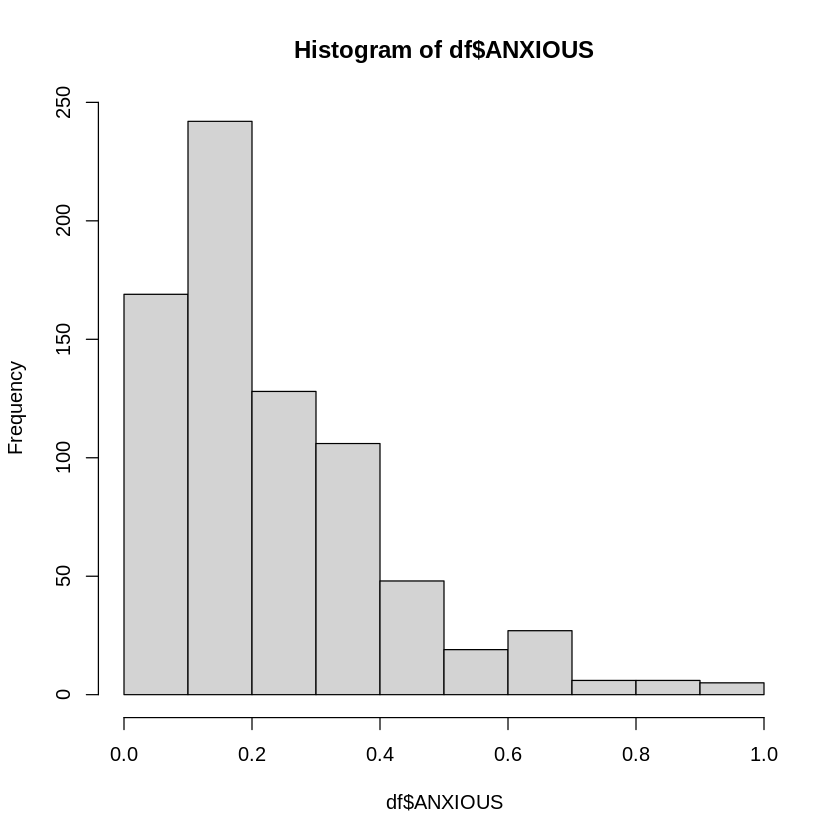

In [ ]:
hist(df$DEPRESSIVE)
hist(df$CYCLOTHYMIC)
hist(df$HYPERTHYMIC)
hist(df$IRRITABLE)
hist(df$ANXIOUS)
#можно достроить информацию о среднем и ст. отклонении + линию, порпобуем построит линию графика

In [ ]:
head(df, 5)

,age,sex,profgroup,DEPRESSIVE,CYCLOTHYMIC,HYPERTHYMIC,IRRITABLE,ANXIOUS,row_num
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,32,Male,1,0.1904762,0.00000000,0.4285714,0.00,0.03846154,1
2,21,Male,1,0.0952381,0.00000000,0.4285714,0.05,0.03846154,2
3,33,Male,1,0.1428571,0.04761905,0.4285714,0.05,0.11538462,3
4,31,Male,1,0.1904762,0.00000000,0.1904762,0.00,0.03846154,4
5,35,Male,1,0.1428571,0.00000000,0.4285714,0.00,0.03846154,5


In [ ]:
help(kruskal.test)

ТК распределение ненормальное, выбираем критерий Краскелла-Уоллиса

In [ ]:
kruskal.test(DEPRESSIVE ~ profgroup, data = df)
kruskal.test(CYCLOTHYMIC ~ profgroup, data = df)
kruskal.test(HYPERTHYMIC ~ profgroup, data = df)
kruskal.test(IRRITABLE ~ profgroup, data = df)
kruskal.test(ANXIOUS ~ profgroup, data = df)
# делаем сравнение средних одной шкалы по данным для всех профгрупп, но запнулись с этой функцией, так как краскалл-уоллис
# показывает лишь выходят ли данные из одного распределения, что не дает информации про сравнение шкал


	Kruskal-Wallis rank sum test

data:  DEPRESSIVE by profgroup
Kruskal-Wallis chi-squared = 71.243, df = 5, p-value = 5.647e-14



	Kruskal-Wallis rank sum test

data:  CYCLOTHYMIC by profgroup
Kruskal-Wallis chi-squared = 55.737, df = 5, p-value = 9.208e-11



	Kruskal-Wallis rank sum test

data:  HYPERTHYMIC by profgroup
Kruskal-Wallis chi-squared = 93.057, df = 5, p-value < 2.2e-16



	Kruskal-Wallis rank sum test

data:  IRRITABLE by profgroup
Kruskal-Wallis chi-squared = 14.948, df = 5, p-value = 0.01059



	Kruskal-Wallis rank sum test

data:  ANXIOUS by profgroup
Kruskal-Wallis chi-squared = 62.624, df = 5, p-value = 3.483e-12


In [ ]:
summary(df)

получается, все средние различаются, но меньше всего irritable

3.05. Пока остановилась, что узнала из анализа: данные распределены ненормально, колмогоров-смирнов не подойдет для проверки, не уверена, что верно применяют краскелла-уоллиса, нужно сотнестись с гипотезами. пока ничего не подтверждается, проверить внимательнее работу со свежим взглядом

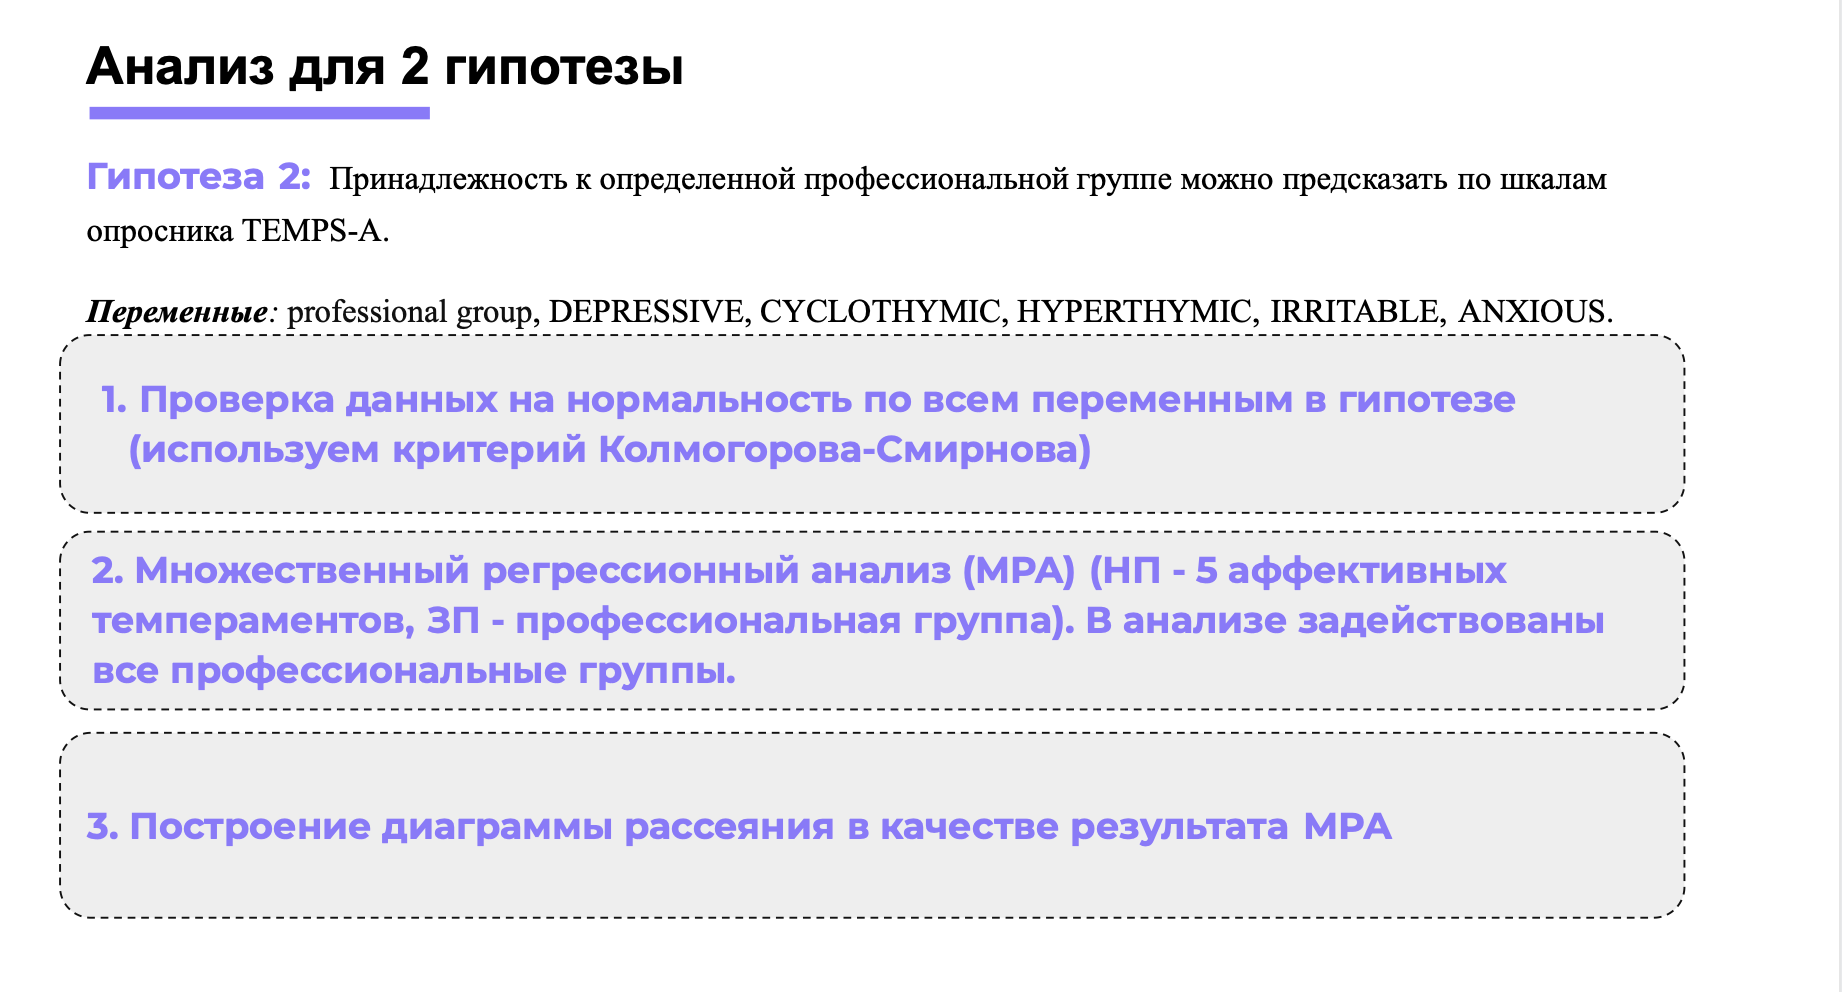

#Задача: провести 6 биномиальных регрессий по всем шкалам по соответствию профессиональной группе

In [1]:
data$pg_1 <- as.factor (ifelse (data$profgroup == 1, 1, 0))


In [2]:
head(df)

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

In [ ]:
#для визуализации нескольких линейных зависимостей
install.packages("car")
#load car package
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




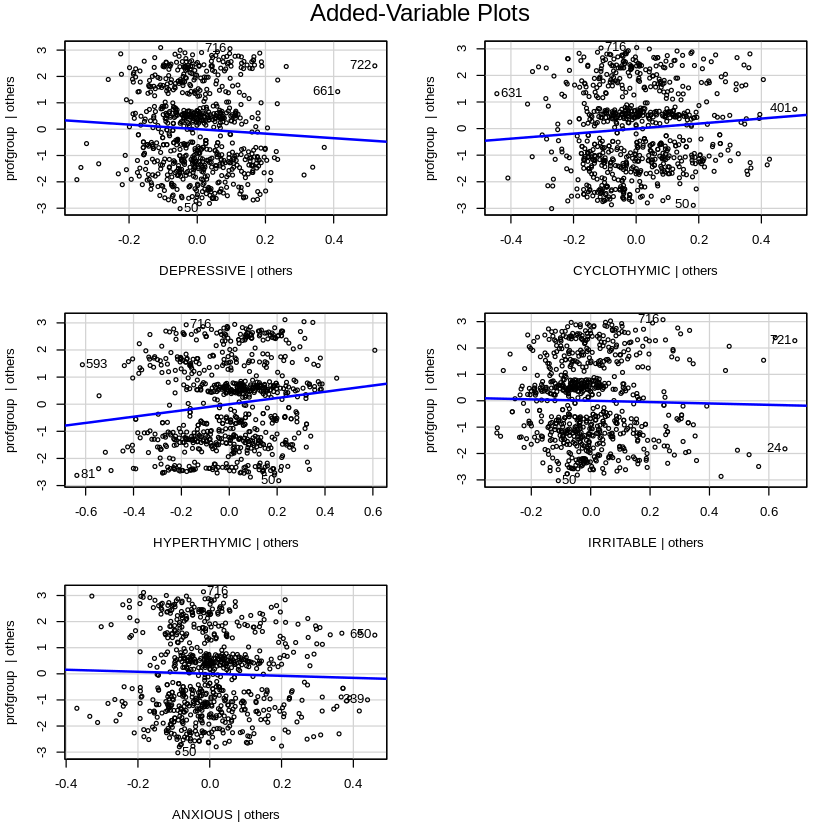

In [ ]:
#produce added variable plots
avPlots(model)

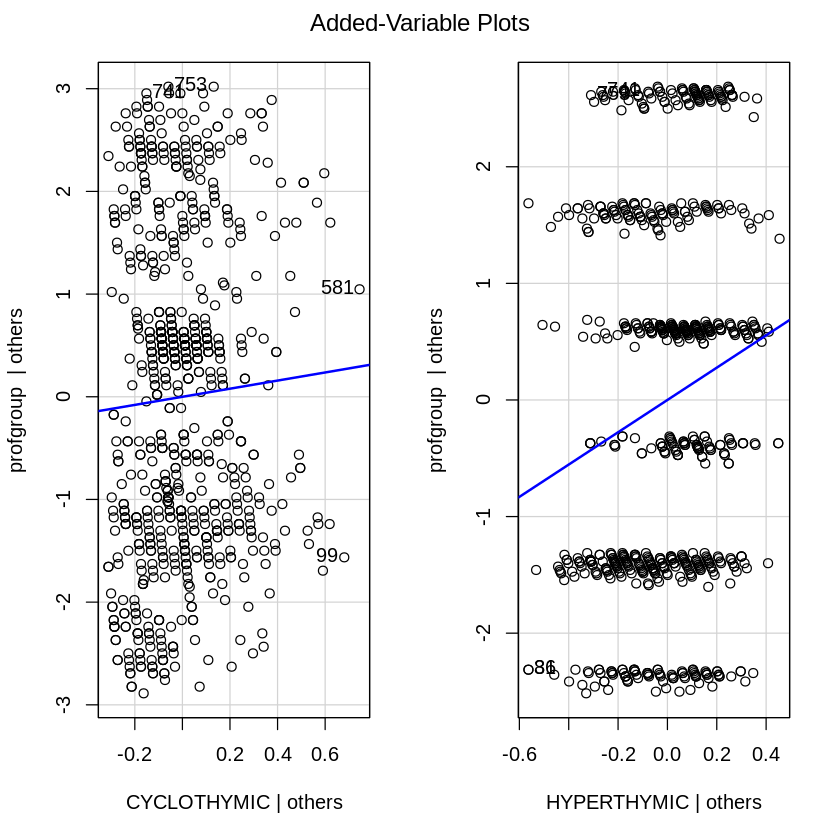

In [ ]:
avPlots(model_2)

In [ ]:
Видно, что зависимость положительная есть только у cyclothymic и hyperthumic, как и было показано на p-value. 

In [ ]:
#посмотрим на размер эффекта средних каждой групы для каждой шкалы интеллекта 

# Работаем над выводом размера эффекта

In [ ]:
install.packages("effsize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(effsize)

In [ ]:
#цикл с доски
a = data.frame()
options(warn=-1)
for (i in 1:6) { #when loop is ready change this line to v
  for (j in 2:6) { #when loop is ready change this line to i
    for (v in 4:8) { #when loop is ready change this line to j
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', v, '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(df[df$profgroup == i | df$profgroup == j, v], df[df$profgroup == i | df$profgroup == j, 3])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a <- rbind(a, c(label, cd$estimate)) # не получается залить в датасет, там описание, а нужно лишь цифру достать
    }
  }
}
options(warn=0)

In [ ]:
head(a) #получаются дикие значения

,X.1..group..2..group..4..scale.,X..3.93857808028859.
,<chr>,<chr>
1,"1 -group, 2 -group, 4 -scale",-3.93857808028859
2,"1 -group, 3 -group, 4 -scale",-2.39925860834723
3,"1 -group, 4 -group, 4 -scale",-2.81284084004678
4,"1 -group, 5 -group, 4 -scale",-2.0026372226478
5,"1 -group, 6 -group, 4 -scale",-1.845986763899
6,"2 -group, 3 -group, 4 -scale",-5.82249861408744


In [ ]:
cohen.d(df[df$profgroup == 1 | df$profgroup == 4, 4], df[df$profgroup == 1 | df$profgroup == 4, 3]) #выдает фигню, нужно число от 0 до 1


Cohen's d

d estimate: -2.812841 (large)
95 percent confidence interval:
    lower     upper 
-3.044080 -2.581602 


In [ ]:
#меняем цикл с доски -- пусть итерируется столбцами 
a = data.frame() 
options(warn=-1)  
for (v in colnames(df)[4:8]) { #when loop is ready change this line to v
  for (i in 1:6) { #when loop is ready change this line to i
    for (j in 2:6) { #when loop is ready change this line to j
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', v, '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(formula = v~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a <- rbind(a, c(label, cd$estimate)) # не получается залить в датасет, там описание, а нужно лишь цифру достать
    }
  }
}
options(warn=0)

ERROR: ignored

In [ ]:
cohen.d(df[ , 4], df[df$profgroup == 1 | df$profgroup == 4, 3])


Cohen's d

d estimate: -3.751528 (large)
95 percent confidence interval:
    lower     upper 
-3.962223 -3.540833 


In [ ]:
cohen.d(formula=DEPRESSIVE~profgroup,data=df[df$profgroup == 4 | df$profgroup == 2,])


Cohen's d

d estimate: 0.558308 (medium)
95 percent confidence interval:
    lower     upper 
0.3558708 0.7607453 


In [ ]:
help(cohen.d)

In [ ]:
#переделываем в третий раз цикл как мне это надоело // УРА РАБОТАЕТ

a_3 = data.frame() 
options(warn=-1)  
  for (i in 1:6) { 
    for (j in 2:6) { 
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', v, '-scale'), collapse = ' ') #лейблируем в тексте 
      cd <- cohen.d(formula = DEPRESSIVE~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a_3 <- rbind(a_3, c(label, cd$estimate)) # не получается залить в датасет, там описание, а нужно лишь цифру достать
    }
  }
options(warn=0)

In [ ]:
#переделываем в третий раз цикл как мне это надоело // УРА РАБОТАЕТ. делаем полный цикл

a_4 = data.frame() 
#for DEPRESSIVE
options(warn=-1)  
  for (i in 1:6) { 
    for (j in 2:6) { 
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', "DEPRESSIVE", '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(formula = DEPRESSIVE~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      a_4 <- rbind(a_4, c(label, cd$estimate))
    }
  }
options(warn=0)

#for CYCLOTHYMIC
options(warn=-1)  
  for (i in 1:6) { 
    for (j in 2:6) { 
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', "CYCLOTHYMIC", '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(formula = CYCLOTHYMIC~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a_4 <- rbind(a_4, c(label, cd$estimate)) 
    }
  }
options(warn=0)

#for HYPERTHYMIC

options(warn=-1)  
  for (i in 1:6) { 
    for (j in 2:6) { 
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', "HYPERTHYMIC", '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(formula = HYPERTHYMIC~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a_4 <- rbind(a_4, c(label, cd$estimate)) 
    }
  }
options(warn=0)

#for IRRITABLE
options(warn=-1)  
  for (i in 1:6) { 
    for (j in 2:6) { 
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', "IRRITABLE", '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(formula = IRRITABLE~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a_4 <- rbind(a_4, c(label, cd$estimate)) # не получается залить в датасет, там описание, а нужно лишь цифру достать
    }
  }
options(warn=0)

#for ANXIOUS
options(warn=-1)  
  for (i in 1:6) { 
    for (j in 2:6) { 
      if(i==j) next
      label <- paste(c(i, '-group,', j, '-group,', "ANXIOUS", '-scale'), collapse = ' ') #лейблируем в тексте
      cd <- cohen.d(formula = ANXIOUS~profgroup, data =  df[df$profgroup == i | df$profgroup == j,])#берем в строки значения в колонке темперамента, в столбцы прогруппу, где 2 фактора
      #print(c(i,j,v,cd))
      a_4 <- rbind(a_4, c(label, cd$estimate)) # не получается залить в датасет, там описание, а нужно лишь цифру достать
    }
  }
options(warn=0)


In [ ]:
head(a_4) #УРА !!! мы получили это 

,X.1..group..2..group..DEPRESSIVE..scale.,X..0.596010947196895.
,<chr>,<chr>
1,"1 -group, 2 -group, DEPRESSIVE -scale",-0.596010947196895
2,"1 -group, 3 -group, DEPRESSIVE -scale",0.351701054308447
3,"1 -group, 4 -group, DEPRESSIVE -scale",-0.154171095957829
4,"1 -group, 5 -group, DEPRESSIVE -scale",0.0492503635264866
5,"1 -group, 6 -group, DEPRESSIVE -scale",-0.168402157823302
6,"2 -group, 3 -group, DEPRESSIVE -scale",0.922646282921618


In [ ]:
cat(capture.output(print(a_4), file="cohend.csv")) #cохранили датасет в csv

Here is how to interpret each plot:

- The x-axis displays a single predictor variable and the y-axis displays the response variable.
- The blue line shows the association between the predictor variable and the response variable, while holding the value of all other predictor variables constant.
- The points that are labelled in each plot represent the 2 observations with the largest residuals and the 2 observations with the largest partial leverage.
Note that the angle of the line in each plot matches the sign of the coefficient from the estimated regression equation.

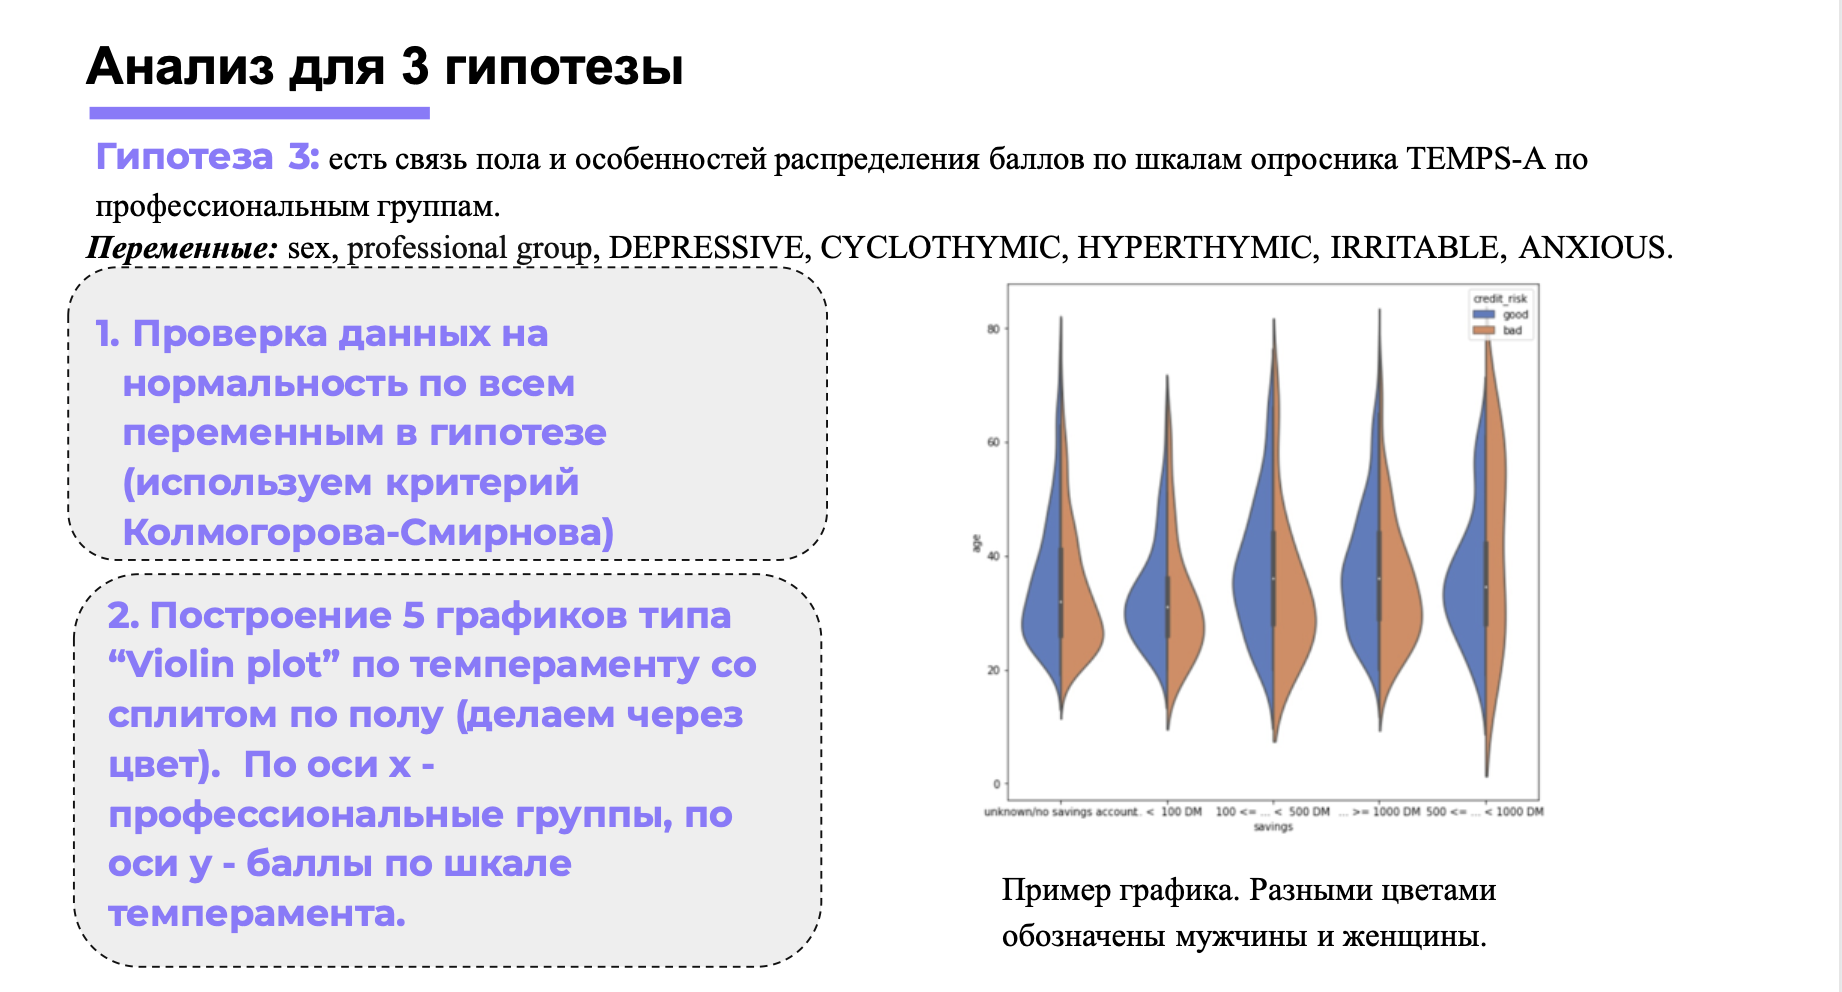

In [ ]:
#сделала в python, папка violins plot